In [1]:
%matplotlib inline

In [2]:
folder = r'C:\Users\pellan\OneDrive - CSTBGroup\Thèse stratégie carbone\Articles\Journal_papers\Carbon_budgets_Building_Environment\French_WLC_budgets'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyam
from pyam.plotting import OUTSIDE_LEGEND

<IPython.core.display.Javascript object>

# Trajectories by sectors

In [5]:
df_sectors = pd.read_excel(folder + "\Top_down_pathways.xlsx", sheet_name='Embodied_results')

In [6]:
df_sectors

,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,2030,2035,2040,2050
0,IEA,Stated Policies Scenario,"Agriculture, hunting, forestry & fishing",Emissions|CO2eq,Mt CO2eq/yr,2.612800,2.449883,NaN,NaN,2.686741,2.640792,2.599466,2.546786
1,IEA,Stated Policies Scenario,Cement,Emissions|CO2eq,Mt CO2eq/yr,13.266768,13.694071,NaN,NaN,13.627222,13.765567,13.815069,13.502063
2,IEA,Stated Policies Scenario,Construction,Emissions|CO2eq,Mt CO2eq/yr,2.351246,2.314106,NaN,NaN,2.527100,2.543338,2.538435,2.443557
3,IEA,Stated Policies Scenario,Electrical & machinery,Emissions|CO2eq,Mt CO2eq/yr,1.135028,1.064255,NaN,NaN,1.167148,1.147188,1.129235,1.106350
4,IEA,Stated Policies Scenario,Electricity,Emissions|CO2eq,Mt CO2eq/yr,4.869018,4.728085,NaN,NaN,4.298835,3.749340,3.388342,2.871300
5,IEA,Stated Policies Scenario,Financial intermediation & business activity,Emissions|CO2eq,Mt CO2eq/yr,1.581572,1.601322,NaN,NaN,1.743850,1.623244,1.552274,1.559357
6,IEA,Stated Policies Scenario,Gas,Emissions|CO2eq,Mt CO2eq/yr,0.827316,0.815364,NaN,NaN,0.876781,0.860660,0.849719,0.835163
7,IEA,Stated Policies Scenario,Iron & Steel,Emissions|CO2eq,Mt CO2eq/yr,3.839168,3.768619,NaN,NaN,4.747047,4.781606,4.736328,4.477129
8,IEA,Stated Policies Scenario,Manufacturing & recycling,Emissions|CO2eq,Mt CO2eq/yr,0.440177,0.433224,NaN,NaN,0.473099,0.476139,0.475221,0.457459
9,IEA,Stated Policies Scenario,Metal & metal products,Emissions|CO2eq,Mt CO2eq/yr,2.536222,2.496160,NaN,NaN,2.725911,2.743426,2.738137,2.635795


In [7]:
df_sectors = pyam.IamDataFrame(df_sectors)
df_sectors

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : IEA (1)
 * scenario : Announced Pledges Scenario, Net Zero Scenario, Stated Policies Scenario (3)
Timeseries data coordinates:
   region   : Agriculture, hunting, forestry & fishing, ... (19)
   variable : Emissions|CO2eq (1)
   unit     : Mt CO2eq/yr (1)
   year     : 2019, 2020, 2030, 2035, 2040, 2050 (6)
Meta indicators:
   exclude (bool) False (1)

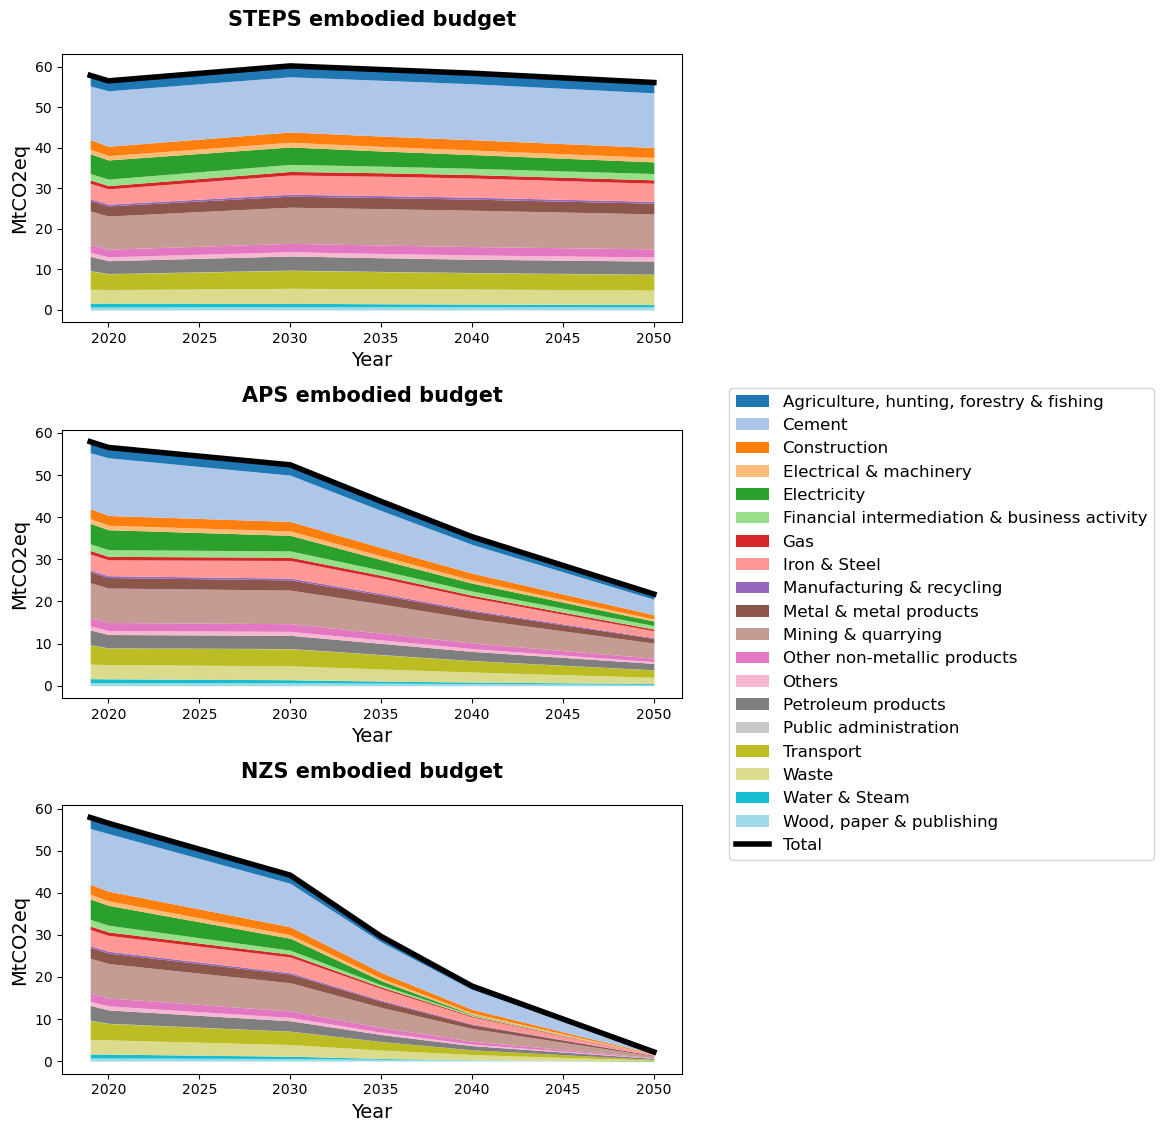

In [9]:
import matplotlib.pyplot as plt

# Filter data_STEPS
data_STEPS = df_sectors.filter(model="IEA", scenario="Stated Policies Scenario", variable="Emissions|CO2eq").filter(
    region="World", keep=False
)

# Filter data_AP
data_APS = df_sectors.filter(model="IEA", scenario="Announced Pledges Scenario", variable="Emissions|CO2eq").filter(
    region="World", keep=False
)


# Filter data_NZS
data_NZS = df_sectors.filter(model="IEA", scenario="Net Zero Scenario", variable="Emissions|CO2eq").filter(
    region="World", keep=False
)

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot data_STEPS
data_STEPS.plot.stack(ax=ax1, stack="region", cmap="tab20", title="Stated Policies", legend=False, total=True)

# Customize the first subplot
title_text_STEPS = 'STEPS embodied budget'
ax1.set_title(title_text_STEPS, fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_APS
data_APS.plot.stack(ax=ax2, stack="region", cmap="tab20", title='Announced Pledges', legend=False, total=True)

# Customize the second subplot
title_text_APS = 'APS embodied budget'
ax2.set_title(title_text_APS, fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_NZS
data_NZS.plot.stack(ax=ax3, stack="region", cmap="tab20", title='Net Zero Scenario', legend=False, total=True)

# Customize the third subplot
title_text_NZS = 'NZS embodied budget'
ax3.set_title(title_text_NZS, fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('MtCO2eq', fontsize=14)

# Get the handles and labels from one of the subplots
handles, labels = ax1.get_legend_handles_labels()

# Create the legend on the right side
fig.legend(handles, labels, loc='center right', fontsize=12, ncol=1, bbox_to_anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=0.4, bottom=0.2)

plt.show()


# WLC pathways

In [10]:
df_wlc = pd.read_excel(folder + "\Top_down_pathways.xlsx", sheet_name='WLC_results')

In [11]:
# Interpolate missing values in each row using linear interpolation
columns_to_interpolate = df_wlc.columns[5:]
df_wlc[columns_to_interpolate] = df_wlc.groupby(['Model', 'Scenario', 'Region', 'Variable', 'Unit'])[columns_to_interpolate].apply(lambda group: group.interpolate(method='linear', axis=1))
df_wlc

C:\Users\pellan\AppData\Local\Temp\ipykernel_10176\3765986785.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_wlc[columns_to_interpolate] = df_wlc.groupby(['Model', 'Scenario', 'Region', 'Variable', 'Unit'])[columns_to_interpolate].apply(lambda group: group.interpolate(method='linear', axis=1))


,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,2023,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,IEA,SNBC-STEPS,France,Direct operational GHGE,Mt CO2eq/yr,83.300000,81.446725,78.223466,75.000208,71.776949,...,24.924117,22.716937,20.509758,18.302578,16.095399,13.888219,11.681039,9.473860,7.266680,5.059501
1,IEA,SNBC-STEPS,France,Indirect operational GHGE,Mt CO2eq/yr,21.263654,20.415464,19.820931,19.226399,18.631866,...,7.068943,6.396107,5.723271,5.050435,4.377599,3.704763,3.031927,2.359091,1.686255,1.013419
2,IEA,SNBC-STEPS,France,Embodied GHGE,Mt CO2eq/yr,57.915380,56.552857,56.921657,57.290456,57.659256,...,58.213578,57.984182,57.754786,57.525391,57.295995,57.066599,56.837204,56.607808,56.378412,56.149016
3,IEA,SNBC-APS,France,Direct operational GHGE,Mt CO2eq/yr,83.300000,81.446725,78.223466,75.000208,71.776949,...,24.924117,22.716937,20.509758,18.302578,16.095399,13.888219,11.681039,9.473860,7.266680,5.059501
4,IEA,SNBC-APS,France,Indirect operational GHGE,Mt CO2eq/yr,21.263654,20.415464,19.820931,19.226399,18.631866,...,7.068943,6.396107,5.723271,5.050435,4.377599,3.704763,3.031927,2.359091,1.686255,1.013419
5,IEA,SNBC-APS,France,Embodied GHGE,Mt CO2eq/yr,57.915380,56.552857,56.140482,55.728107,55.315732,...,34.000108,32.638956,31.277804,29.916653,28.555501,27.194349,25.833197,24.472045,23.110893,21.749741
6,IEA,SNBC-NZS,France,Direct operational GHGE,Mt CO2eq/yr,83.300000,81.446725,78.223466,75.000208,71.776949,...,24.924117,22.716937,20.509758,18.302578,16.095399,13.888219,11.681039,9.473860,7.266680,5.059501
7,IEA,SNBC-NZS,France,Indirect operational GHGE,Mt CO2eq/yr,21.263654,20.415464,19.820931,19.226399,18.631866,...,7.068943,6.396107,5.723271,5.050435,4.377599,3.704763,3.031927,2.359091,1.686255,1.013419
8,IEA,SNBC-NZS,France,Embodied GHGE,Mt CO2eq/yr,57.915380,56.552857,55.317919,54.082981,52.848043,...,16.256539,14.691135,13.125731,11.560328,9.994924,8.429520,6.864117,5.298713,3.733309,2.167906


In [12]:
iamdf_wlc = pyam.IamDataFrame(df_wlc)
iamdf_wlc.scenario

['SNBC-APS', 'SNBC-NZS', 'SNBC-STEPS']

In [13]:
iamdf_wlc_variable = ['Direct operational GHGE', 'Indirect operational GHGE', 'Embodied GHGE']

variable_order = [
    "Direct operational GHGE",
    "Indirect operational GHGE",
    "Embodied GHGE"
]
color_mapping = {
    'Direct operational GHGE': '#D00000',
    'Indirect operational GHGE': '#FFBA08', 
    'Embodied GHGE': '#1C3144',
}
from matplotlib.colors import ListedColormap

def create_custom_colormap(color_mapping, order):
    return ListedColormap([color_mapping[var] for var in order if var in color_mapping])

cmap_custom = create_custom_colormap(color_mapping, iamdf_wlc_variable)


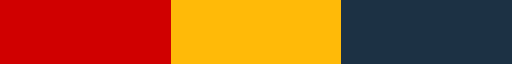

In [14]:
cmap_custom 

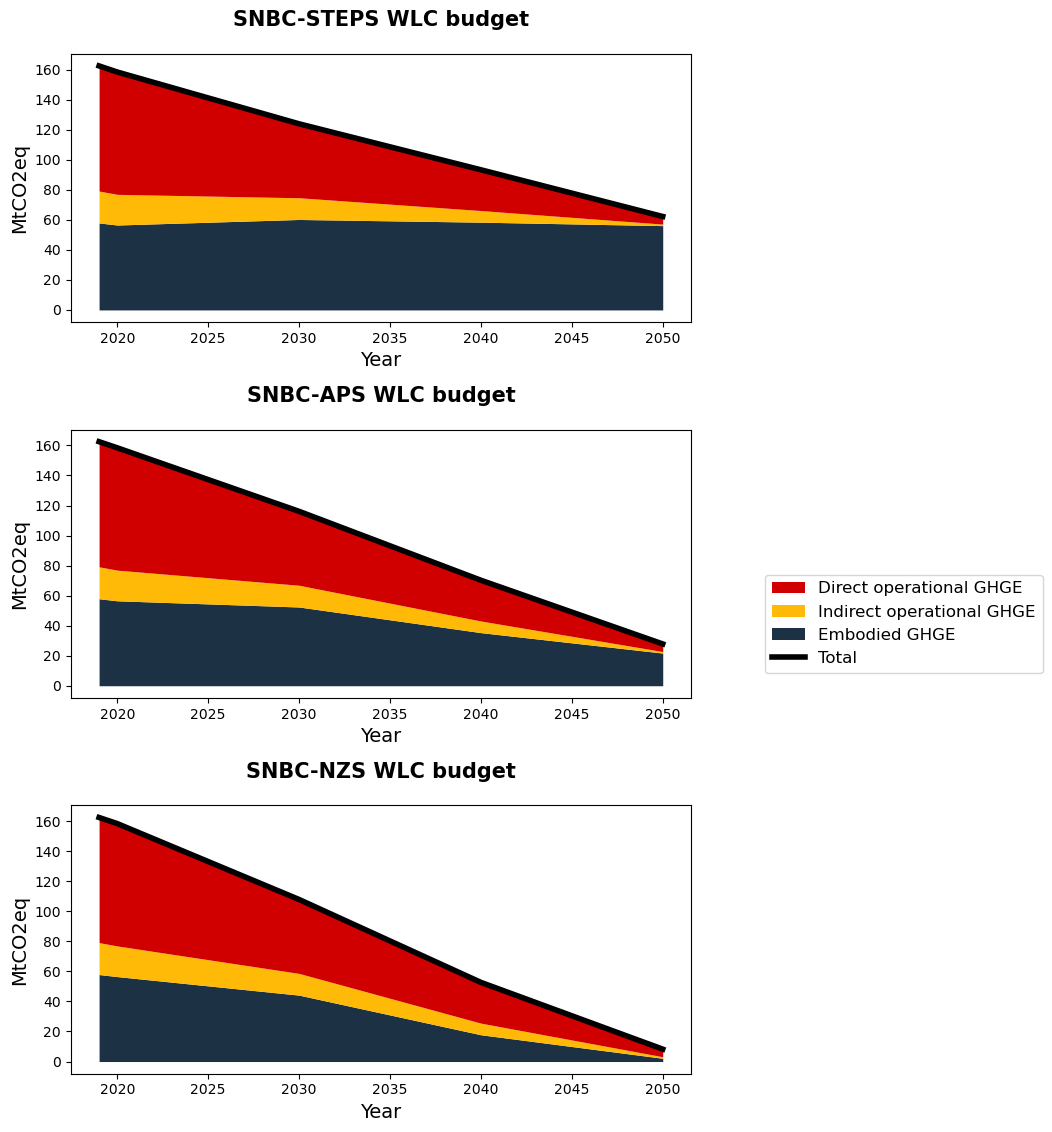

In [15]:
import matplotlib.pyplot as plt

# Filter data_AP
data_STEPS = iamdf_wlc.filter(scenario="SNBC-STEPS")

# Filter data_SD
data_APS = iamdf_wlc.filter(scenario="SNBC-APS")

# Filter data_NZS
data_NZS = iamdf_wlc.filter(scenario="SNBC-NZS")

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot data_STEPS
data_STEPS.plot.stack(ax=ax1, stack="variable", cmap=cmap_custom, title="SNBC-STEPS WLC budget", legend=False, total=True, order=variable_order)

# Customize the first subplot
title_text_STEPS = 'SNBC-STEPS WLC budget'
ax1.set_title(title_text_STEPS, fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_APS
data_APS.plot.stack(ax=ax2, stack="variable", cmap=cmap_custom, title='SNBC-APS WLC budget', legend=False, total=True, order=variable_order)

# Customize the second subplot
title_text_APS = 'SNBC-APS WLC budget'
ax2.set_title(title_text_APS, fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_NZS
data_NZS.plot.stack(ax=ax3, stack="variable", cmap=cmap_custom, title='SNBC-NZS WLC budget', legend=False, total=True, order=variable_order)

# Customize the third subplot
title_text_NZS = 'SNBC-NZS WLC budget'
ax3.set_title(title_text_NZS, fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('MtCO2eq', fontsize=14)

# Get the handles and labels from one of the subplots
handles, labels = ax1.get_legend_handles_labels()

# Create the legend on the right side
fig.legend(handles, labels, loc='center right', fontsize=12, ncol=1, bbox_to_anchor=(1.35, 0.5))

plt.subplots_adjust(hspace=0.4, bottom=0.2)

plt.show()